In [49]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import stan
import nest_asyncio

nest_asyncio.apply()
plt.ion()

DATA_DIR = "./Data/Weekly_Counts_of_Deaths_by_State_and_Select_Causes__2014-2019.csv"

df = pd.read_csv(DATA_DIR) 

df = df.iloc[:, :17]  # Drop all the flag

# Sep: Soc nhiem khuan
# Malignant: Khoi u ac tinh
# Diabete: Tieu duong
# Alzheimer: Mat tri nho
# Influenze: Cum - Viem phoi
# Chronic: Nhiem trung duong ho hap duoi man tinh
# Other: nhung benh duong ho hap khac
# Nephristic: Viem than, than hu -> co qua nhieu protein trong nuoc tieu, benh than ma ko co viem nhiem
# Symtoms: Ket qua bat thuong nhung chua dc define
# Diseases of heart: tim co vn de
# Cerebrovascular: Mach mau toi tim, tim len nao
# Visualization
sns.set_theme()


# for x in df.columns[5:]:
#     df[x] = df[x] / df["All  Cause"]

In [2]:
df.shape

(16902, 17)

In [ ]:
sns.displot(df.loc[df["Jurisdiction of Occurrence"] == "Florida", df.columns[6:17]], kind='kde')
sns.displot(df, x = "Malignant neoplasms (C00-C97)", hue = "Jurisdiction of Occurrence", kind = "kde")

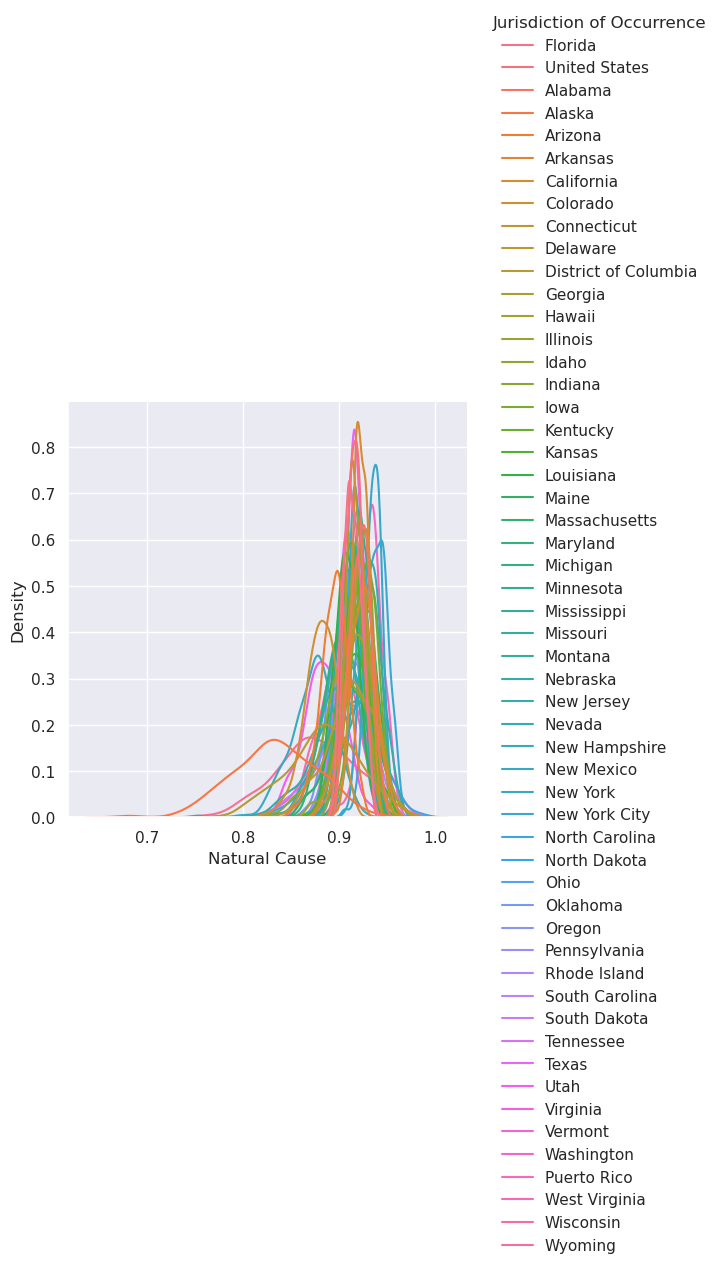

In [22]:
sns.displot(df, x = "Natural Cause", hue = "Jurisdiction of Occurrence", kind = "kde")

In [ ]:
mask = df.isna().sum(axis = 1)

## Row that contains na values
df[mask >= 1].isna().sum()



In [73]:
import warnings
warnings.filterwarnings('ignore')
## Natural Cause

# Read in each model

with open("natural_cause.stan", "r") as my_file:
    all_models = my_file.read()

pool_model,separate_model, hierarchical_model =   all_models.split("//---")

# Setup data for each model.

# Pool
df_natural_cause = df[["All  Cause", "Natural Cause"]]
summary_pool = df_natural_cause.sum()
data_pool = {'N': summary_pool['All  Cause'], 'y': summary_pool["Natural Cause"]}

# Separate, Hierarchical
data_separate = df.groupby(by=["Jurisdiction of Occurrence"])[["All  Cause", "Natural Cause"]].sum()
groups_nof = data_separate.shape[0]
N_sep = data_separate["All  Cause"].values
y_sep = data_separate["Natural Cause"].values
data_sep = {'g': groups_nof, 'N': N_sep, 'y': y_sep}

# Pool model:

posterior_pool = stan.build(pool_model, data = data_pool);
fit_pool = posterior_pool.sample(num_chains= 4, num_samples = 1000);
df_pool = fit_pool.to_frame()


# Separate model:

posterior_sep = stan.build(separate_model, data = data_sep);
fit_sep = posterior_sep.sample(num_chains= 4, num_samples = 1000);
df_sep = fit_sep.to_frame()

# Hierarchical model:

posterior_hier = stan.build(hierarchical_model, data = data_sep);
fit_hier = posterior_hier.sample(num_chains= 4, num_samples = 1000);
df_hier = fit_hier.to_frame()

Building...



Building: found in cache, done.Messages from stanc:
Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 2e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.02 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.02 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.04 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.02 seconds.
  Adjust your expectations accordingly!


Building...



Building: found in cache, done.Messages from stanc:
Warning in '/tmp/httpstan_c77opt74/model_gxz6ivnz.stan', line 6, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/tmp/httpstan_c77opt74/model_gxz6ivnz.stan', line 7, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/tmp/httpstan_c77opt74/model_gxz6ivnz.stan', line 10, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-forma

Building...

/home/hieunguyen/.cache/httpstan/4.9.1/models/otwmyce4/model_otwmyce4.cpp: In constructor ‘model_otwmyce4_namespace::model_otwmyce4::model_otwmyce4(stan::io::var_context&, unsigned int, std::ostream*)’:
/home/hieunguyen/.cache/httpstan/4.9.1/models/otwmyce4/model_otwmyce4.cpp:60:11: warning: variable ‘pos__’ set but not used [-Wunused-but-set-variable]
   60 |       int pos__ = std::numeric_limits<int>::min();
      |           ^~~~~
In file included from /home/hieunguyen/Learning/BDA/Project/stan_env/lib/python3.10/site-packages/httpstan/include/stan/math/prim/fun.hpp:124,
                 from /home/hieunguyen/Learning/BDA/Project/stan_env/lib/python3.10/site-packages/httpstan/include/stan/math/rev/fun/multiply.hpp:7,
                 from /home/hieunguyen/Learning/BDA/Project/stan_env/lib/python3.10/site-packages/httpstan/include/stan/math/rev/fun/elt_multiply.hpp:9,
                 from /home/hieunguyen/Learning/BDA/Project/stan_env/lib/python3.10/site-packages/httpstan/include/st


Building: 11.3s, done.Messages from stanc:
Warning in '/tmp/httpstan_zk8q2p8s/model_otwmyce4.stan', line 6, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/tmp/httpstan_zk8q2p8s/model_otwmyce4.stan', line 7, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/tmp/httpstan_zk8q2p8s/model_otwmyce4.stan', line 12, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to

In [76]:
print('----')
print()
print()
print(df_pool.head(5))
print('----')
print()
print()
print(df_sep.head(5))
print('----')
print()
print()
print(df_hier.head(5))


----


parameters          lp__  accept_stat__  stepsize__  treedepth__  \
draws                                                              
0          -9.633229e+06       0.701985    0.186522          2.0   
1          -9.633226e+06       1.000000    0.190929          2.0   
2          -9.633227e+06       0.950151    0.197843          1.0   
3          -9.633228e+06       1.000000    0.185148          1.0   
4          -9.633228e+06       1.000000    0.186522          1.0   

parameters  n_leapfrog__  divergent__      energy__     theta  
draws                                                          
0                    3.0          0.0  9.633230e+06  0.915725  
1                    3.0          0.0  9.633227e+06  0.915825  
2                    1.0          0.0  9.633227e+06  0.915872  
3                    1.0          0.0  9.633229e+06  0.915746  
4                    1.0          0.0  9.633229e+06  0.915762  
----


parameters          lp__  accept_stat__  stepsize__  treedept